In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sigproc_kit import *

In [3]:

# Replace 'your_file.txt' with the path to your ASCII file
file_path = 'Raw_Data.csv'

# Read the first 1000 lines of the whitespace-separated file into a DataFrame
#df = pd.read_csv(file_path, delim_whitespace=True, nrows=100, skiprows = 1, header=None)
df = pd.read_csv(file_path,header=None, skiprows = 1)

# Display the DataFrame
df.head(30)

,0,1,2,3,4
0,0.011622,-3.476381,0.782904,9.121908,9.793231
1,0.013622,-3.488352,0.790087,9.114726,9.791377
2,0.015621,-3.483563,0.797269,9.105149,9.781339
3,0.017621,-3.481169,0.787692,9.107543,9.781939
4,0.019621,-3.481169,0.785298,9.102755,9.777289
5,0.021621,-3.478775,0.787692,9.107543,9.781088
6,0.023620,-3.488352,0.785298,9.109938,9.786534
7,0.025620,-3.488352,0.782904,9.117120,9.793029
8,0.027619,-3.490746,0.794875,9.121908,9.799303
9,0.029619,-3.485958,0.790087,9.121908,9.797211


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


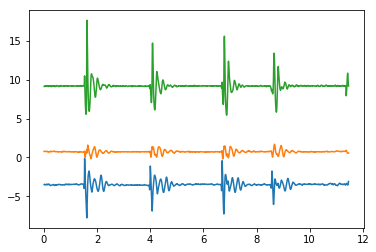

In [4]:
plt.plot(df[0],df[1])
plt.plot(df[0],df[2])
plt.plot(df[0],df[3])

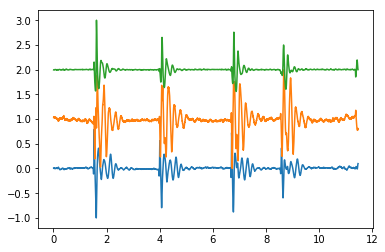

In [5]:
t = np.array(df[0])
L = np.array(df[1])
L = remove_baseline(L)
L = L/np.max(np.abs(L))

R = np.array(df[2])
R = remove_baseline(R)
R = R/np.max(np.abs(R))

Z = np.array(df[3])
Z = remove_baseline(Z)
Z = Z/np.max(np.abs(Z))

plt.plot(t,L)
plt.plot(t,R+1)
plt.plot(t,Z+2)

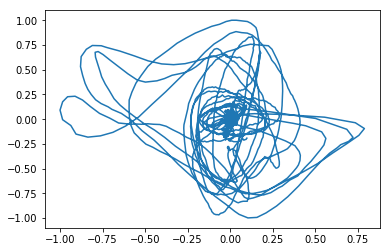

In [6]:
plt.plot(L,R)

In [7]:

%matplotlib notebook

<IPython.core.display.Javascript object>


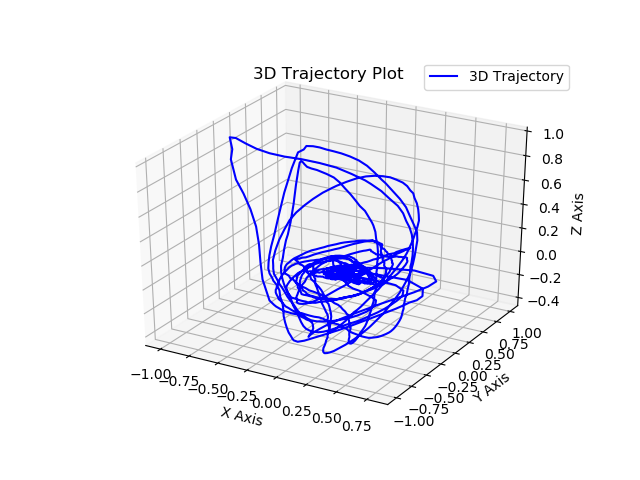

In [8]:
# Step 2: Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Step 3: Plot the trajectory
ax.plot(L, R, Z, label='3D Trajectory', color='b')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Trajectory Plot')
ax.legend()

plt.show()

In [9]:
import scipy.io.wavfile



#scipy.io.wavfile.write("sound.wav",44000,microphone)

#values go from -1 to 1

# stereo
scipy.io.wavfile.write("sound.wav",44000,np.transpose(np.array([L,R])))